In [ ]:
#pip install labelme albumentations

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
from tensorflow import keras
import time
import uuid


c:\Users\ujwal\anaconda3\envs\py310\lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.3)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


In [2]:
uuid.uuid1()#creates unique id's

UUID('695f8150-acc9-11ef-9982-9684b016df21')

In [3]:
img_path=os.path.join('data','images')
number_of_img=30

<h2>Review Dataset and Build Image Loading Function</h2>

In [4]:
def captureimg():
    cap=cv2.VideoCapture(0)#cam number
    for imgnum in range(number_of_img):
        print("collecting images {}".format(imgnum))
        ret,frame=cap.read()
        img_name=os.path.join(img_path,f'{str(uuid.uuid1())}.jpg')
        cv2.imwrite(img_name,frame)
        '''cv2.imwrite()
        method is used to save an image to any storage device. 
        This will save the image according to the specified format
        in current working directory.'''
        #cv2.imshow('frame',frame)
        time.sleep(0.7)#time between vedio capture
        if cv2.waitKey(1) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    

In [6]:
#captureimg() #run this only for collecting the images on live

collecting images 0
collecting images 1
collecting images 2
collecting images 3
collecting images 4
collecting images 5
collecting images 6
collecting images 7
collecting images 8
collecting images 9
collecting images 10
collecting images 11
collecting images 12
collecting images 13
collecting images 14
collecting images 15
collecting images 16
collecting images 17
collecting images 18
collecting images 19
collecting images 20
collecting images 21
collecting images 22
collecting images 23
collecting images 24
collecting images 25
collecting images 26
collecting images 27
collecting images 28
collecting images 29


In [7]:
#!labelme
#run this for rectangle pointing after new data collection

2024-11-27 19:47:14,312 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\ujwal\.labelmerc


In [8]:
import json

In [9]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

<h2>Load Image into TF Data Pipeline</h2>

In [11]:
images=tf.data.Dataset.list_files('data/images/*.jpg',shuffle=False)
def load_img(x):
    byte_img=tf.io.read_file(x)
    img=tf.io.decode_jpeg(byte_img)
    return img

In [12]:
images=images.map(load_img)
images.as_numpy_iterator().next()

array([[[163, 141, 128],
        [166, 147, 133],
        [177, 159, 147],
        ...,
        [238, 240, 237],
        [238, 240, 237],
        [238, 240, 237]],

       [[163, 141, 128],
        [166, 147, 133],
        [177, 159, 147],
        ...,
        [238, 240, 237],
        [238, 240, 237],
        [238, 240, 237]],

       [[161, 139, 126],
        [164, 145, 131],
        [176, 158, 144],
        ...,
        [238, 240, 237],
        [238, 240, 237],
        [238, 240, 237]],

       ...,

       [[157, 159, 154],
        [156, 158, 153],
        [157, 159, 154],
        ...,
        [211, 217, 215],
        [209, 215, 213],
        [208, 214, 212]],

       [[154, 156, 151],
        [154, 156, 151],
        [154, 156, 151],
        ...,
        [215, 221, 219],
        [213, 219, 217],
        [211, 217, 215]],

       [[154, 156, 151],
        [153, 155, 150],
        [153, 155, 150],
        ...,
        [217, 223, 221],
        [215, 221, 219],
        [213, 219, 217]]

In [ ]:
#The tf.data.Dataset.batch() function is used to group the elements into batches.
img_gen=images.batch(4).as_numpy_iterator()#batch of 4

In [19]:
plot_img=img_gen.next()

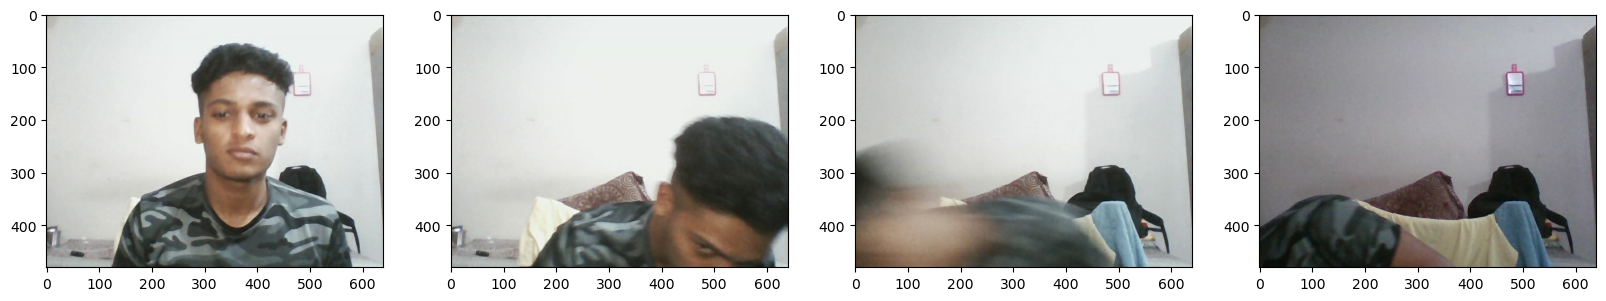

In [20]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,images in enumerate(plot_img):
    ax[idx].imshow(images)
plt.show()

In [21]:
count=0
for img in os.listdir('data/images'):
    count+=1
print(count)

60


In [22]:
60*0.8

48.0

In [23]:
60*0.1


6.0

<h2>Partition Unaugmented Data</h2>

<h3>Move the Matching Labels</h3>

In [24]:
import random
import shutil
def move_img(src,dest,num):
    files=os.listdir(src)
    files_to_move=random.sample(files,num)
    
    for file_name in files_to_move:
        src_path=os.path.join(src,file_name)
        dest_path=os.path.join(dest,file_name)
        shutil.move(src_path,dest_path)
        print(f"moved:{file_name}")

In [27]:
move_img("data/images","data/train/images",48)

moved:d3dca3d8-acc9-11ef-8e00-9684b016df21.jpg
moved:8d575462-acc9-11ef-9327-9684b016df21.jpg
moved:cf141993-acc9-11ef-af3a-9684b016df21.jpg
moved:97cdc0d0-acc9-11ef-9862-9684b016df21.jpg
moved:92256b96-acc9-11ef-977a-9684b016df21.jpg
moved:ce372e94-acc9-11ef-bde1-9684b016df21.jpg
moved:cea57469-acc9-11ef-a2a9-9684b016df21.jpg
moved:94c3fbb3-acc9-11ef-b5be-9684b016df21.jpg
moved:8c03bad2-acc9-11ef-86eb-9684b016df21.jpg
moved:d0cd9d6d-acc9-11ef-90fb-9684b016df21.jpg
moved:8c743bec-acc9-11ef-99ba-9684b016df21.jpg
moved:8ce95d80-acc9-11ef-8750-9684b016df21.jpg
moved:8f81f09e-acc9-11ef-8b61-9684b016df21.jpg
moved:cff04e79-acc9-11ef-91c2-9684b016df21.jpg
moved:90d0cd45-acc9-11ef-bd23-9684b016df21.jpg
moved:8ea4af69-acc9-11ef-95ac-9684b016df21.jpg
moved:8b8d612c-acc9-11ef-8a8d-9684b016df21.jpg
moved:9376a354-acc9-11ef-9f07-9684b016df21.jpg
moved:d05ecf2a-acc9-11ef-a4cd-9684b016df21.jpg
moved:94546f88-acc9-11ef-9672-9684b016df21.jpg
moved:8e35712b-acc9-11ef-870c-9684b016df21.jpg
moved:d91ea73

In [28]:
move_img("data/images","data/test/images",6)

moved:d75b0568-acc9-11ef-9e14-9684b016df21.jpg
moved:d8402762-acc9-11ef-ad26-9684b016df21.jpg
moved:d6ed16d6-acc9-11ef-b3ef-9684b016df21.jpg
moved:961201b2-acc9-11ef-89ab-9684b016df21.jpg
moved:905fe857-acc9-11ef-87fc-9684b016df21.jpg
moved:d1acbffb-acc9-11ef-920a-9684b016df21.jpg


In [29]:
move_img("data/images","data/val/images",6)

moved:d13e7bcb-acc9-11ef-b92c-9684b016df21.jpg
moved:983d246a-acc9-11ef-a4b8-9684b016df21.jpg
moved:93e4ec85-acc9-11ef-ad1a-9684b016df21.jpg
moved:96efacad-acc9-11ef-b009-9684b016df21.jpg
moved:8ff06270-acc9-11ef-a27a-9684b016df21.jpg
moved:d36cc544-acc9-11ef-8ee3-9684b016df21.jpg


In [35]:
def move_label(src):
    for folder in ['train','test','val']:
        for file in os.listdir(os.path.join(src, folder, 'images')):

            filename = file.split('.')[0]+'.json'
            existing_filepath = os.path.join(src,'labels', filename)
            if os.path.exists(existing_filepath): 
                new_filepath = os.path.join(src,folder,'labels',filename)
                os.replace(existing_filepath, new_filepath)  

In [ ]:
#move_label('data') # move the label to the data folder

In [38]:
import albumentations as alb

<h2>Apply Image Augmentation on Images and Labels using Albumentations</h2>

In [40]:
augmentor=alb.Compose([
    alb.RandomCrop(width=450,height=450),
    alb.HorizontalFlip(p=0.5),
    alb.RandomRotate90(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
    alb.ToGray(),
    alb.VerticalFlip(p=0.5),   
],bbox_params=alb.BboxParams(format='albumentations',label_fields=['class_labels']))

In [42]:
img=cv2.imread(os.path.join('data','train','images','8d575462-acc9-11ef-9327-9684b016df21.jpg'))
img

array([[[136, 140, 165],
        [146, 148, 172],
        [157, 160, 181],
        ...,
        [239, 240, 238],
        [239, 240, 238],
        [239, 240, 238]],

       [[136, 140, 164],
        [145, 149, 173],
        [157, 160, 181],
        ...,
        [239, 240, 238],
        [239, 240, 238],
        [239, 240, 238]],

       [[137, 143, 166],
        [146, 151, 172],
        [158, 162, 181],
        ...,
        [239, 240, 238],
        [239, 240, 238],
        [239, 240, 238]],

       ...,

       [[167, 162, 163],
        [166, 162, 161],
        [167, 163, 162],
        ...,
        [215, 215, 203],
        [214, 214, 202],
        [214, 214, 202]],

       [[162, 157, 158],
        [161, 156, 157],
        [158, 156, 156],
        ...,
        [217, 217, 205],
        [217, 217, 205],
        [218, 218, 206]],

       [[153, 150, 152],
        [151, 149, 149],
        [150, 148, 148],
        ...,
        [221, 220, 206],
        [220, 219, 205],
        [219, 218, 204]]

In [43]:
with open(os.path.join('data','train','labels','8d575462-acc9-11ef-9327-9684b016df21.json'),'r') as f:
    label=json.load(f)

In [45]:
label.items()

dict_items([('version', '5.5.0'), ('flags', {}), ('shapes', [{'label': 'face', 'points': [[266.75925925925924, 57.59259259259264], [482.5, 317.77777777777777]], 'group_id': None, 'description': '', 'shape_type': 'rectangle', 'flags': {}, 'mask': None}]), ('imagePath', '..\\images\\8d575462-acc9-11ef-9327-9684b016df21.jpg'), ('imageData', '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRo

In [47]:
label

{'version': '5.5.0',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[266.75925925925924, 57.59259259259264],
    [482.5, 317.77777777777777]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '..\\images\\8d575462-acc9-11ef-9327-9684b016df21.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8

In [48]:
label['shapes']

[{'label': 'face',
  'points': [[266.75925925925924, 57.59259259259264],
   [482.5, 317.77777777777777]],
  'group_id': None,
  'description': '',
  'shape_type': 'rectangle',
  'flags': {},
  'mask': None}]

In [49]:
label['shapes'][0]

{'label': 'face',
 'points': [[266.75925925925924, 57.59259259259264],
  [482.5, 317.77777777777777]],
 'group_id': None,
 'description': '',
 'shape_type': 'rectangle',
 'flags': {},
 'mask': None}

In [50]:
label['shapes'][0]['points']

[[266.75925925925924, 57.59259259259264], [482.5, 317.77777777777777]]

<h3>Extract Coordinates and Rescale to Match Image Resolution</h3>

In [60]:
coord=[0,0,0,0]
coord[0]=label['shapes'][0]['points'][0][0]
coord[1]=label['shapes'][0]['points'][0][1]
coord[2]=label['shapes'][0]['points'][1][0]
coord[3]=label['shapes'][0]['points'][1][1]

In [61]:
coord

[266.75925925925924, 57.59259259259264, 482.5, 317.77777777777777]

In [62]:
img_shape=[640,480,640,480]
coords_shaped=list(np.divide(coord,img_shape))
coords_shaped

[0.41681134259259256, 0.11998456790123466, 0.75390625, 0.662037037037037]

In [65]:
augmented=augmentor(image=img,bboxes=[coords_shaped],class_labels=['face'])

In [67]:
type(augmented)

dict

In [69]:
augmented

{'image': array([[[188, 188, 188],
         [187, 187, 187],
         [183, 183, 183],
         ...,
         [220, 220, 220],
         [220, 220, 220],
         [220, 220, 220]],
 
        [[188, 188, 188],
         [185, 185, 185],
         [183, 183, 183],
         ...,
         [219, 219, 219],
         [219, 219, 219],
         [220, 220, 220]],
 
        [[186, 186, 186],
         [184, 184, 184],
         [181, 181, 181],
         ...,
         [220, 220, 220],
         [219, 219, 219],
         [220, 220, 220]],
 
        ...,
 
        [[ 40,  40,  40],
         [ 39,  39,  39],
         [ 38,  38,  38],
         ...,
         [239, 239, 239],
         [239, 239, 239],
         [239, 239, 239]],
 
        [[ 43,  43,  43],
         [ 42,  42,  42],
         [ 41,  41,  41],
         ...,
         [239, 239, 239],
         [239, 239, 239],
         [239, 239, 239]],
 
        [[ 46,  46,  46],
         [ 45,  45,  45],
         [ 45,  45,  45],
         ...,
         [239, 239,

In [71]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [155]:
augmented['image'].shape

(450, 450, 3)

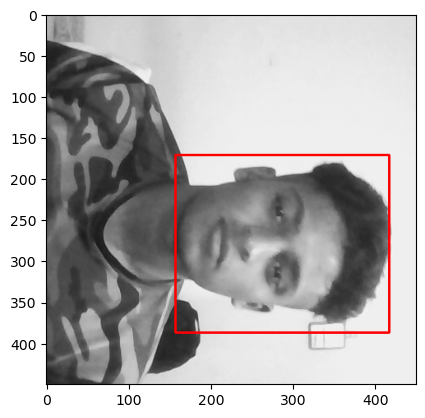

In [74]:
cv2.rectangle(
    augmented['image'],
    tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
    tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
    (255,0,0),
    2
)
plt.imshow(augmented['image'])

<h2>Build and Run Augmentation Pipeline</h2>

<h3>we have to create a BBox & create albument images & label them as face present or not present</h3>

In [89]:
def albumentation_pipeline():
    for partition in ['train','test','val']: 
        for image in os.listdir(os.path.join('data', partition, 'images')):
            img = cv2.imread(os.path.join('data', partition, 'images', image))

            coords = [0,0,0.00001,0.00001]
            label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    label = json.load(f)

                coords[0] = label['shapes'][0]['points'][0][0]
                coords[1] = label['shapes'][0]['points'][0][1]
                coords[2] = label['shapes'][0]['points'][1][0]
                coords[3] = label['shapes'][0]['points'][1][1]
                coords = list(np.divide(coords, [640,480,640,480]))

            try: 
                for x in range(60):#60 extra samples for each img
                    augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                    cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                    #now create label for that file
                    annotation = {}
                    annotation['image'] = image
                    #try creating same file as already created file then to merge the file with existing data

                    if os.path.exists(label_path):
                        if len(augmented['bboxes']) == 0: 
                            annotation['bbox'] = [0,0,0,0]
                            annotation['class'] = 0 
                            #int label for training the model 1/0
                        else: 
                            annotation['bbox'] = augmented['bboxes'][0]
                            annotation['class'] = 1
                    else: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 


                    os.makedirs(os.path.join('aug_data', partition, 'labels'), exist_ok=True)
                    os.makedirs(os.path.join('aug_data', partition, 'images'), exist_ok=True)

                    with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'),'w') as f:
                        json.dump(annotation, f)

            except Exception as e:
                print(e)

    

In [91]:
#albumentation_pipeline() 
#call the func when you need to augment the images

x_max is less than or equal to x_min for bbox [0.16507523 0.36304012 0.00303819 0.81442899 0.        ].
x_max is less than or equal to x_min for bbox [0.03776042 0.39583334 0.00448495 0.86072528 0.        ].


In [ ]:
train_images=tf.data.Dataset.list_files('aug_data/train/images/*.jpg',shuffle=False)
train_images=train_images.map(load_img)
train_images=train_images.map(lambda x:tf.image.resize(x,(120,120)))
train_images=train_images.map(lambda x:x/255.0)

In [94]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_img)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [95]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_img)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [96]:
train_images.as_numpy_iterator().next()

array([[[0.90496325, 0.9074142 , 0.8922181 ],
        [0.90343136, 0.90588236, 0.8906863 ],
        [0.90998775, 0.91243875, 0.89724267],
        ...,
        [0.9228554 , 0.9424632 , 0.92677695],
        [0.9306985 , 0.93854165, 0.92677695],
        [0.9254902 , 0.9406863 , 0.9246324 ]],

       [[0.9098039 , 0.9098039 , 0.9019608 ],
        [0.9136642 , 0.9136642 , 0.9058211 ],
        [0.91764706, 0.91764706, 0.9098039 ],
        ...,
        [0.92156863, 0.9411765 , 0.9254902 ],
        [0.91856617, 0.938174  , 0.92248774],
        [0.9309436 , 0.9393382 , 0.9231005 ]],

       [[0.90998775, 0.90998775, 0.9021446 ],
        [0.9132353 , 0.9132353 , 0.90539217],
        [0.91023284, 0.91023284, 0.9023897 ],
        ...,
        [0.92971814, 0.949326  , 0.9336397 ],
        [0.9259804 , 0.94558823, 0.92990196],
        [0.9411152 , 0.94895834, 0.93719363]],

       ...,

       [[0.12665442, 0.15753676, 0.15153186],
        [0.14258578, 0.16121323, 0.13333334],
        [0.16672795, 0

<h2>explainations in coda notebook under proj</h2>

In [97]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [98]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [102]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.1737 , 0.10767, 0.727  , 0.579  ], dtype=float16))

In [104]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)


(2819, 2820, 299, 300, 359, 360)

<h2>Combine Label and Image Samples</h2>

In [165]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(3000).batch(8).prefetch(4).cache()

test = tf.data.Dataset.zip((test_images, test_labels))
test = test.batch(8).prefetch(4).cache()

val = tf.data.Dataset.zip((val_images, val_labels))
val = val.batch(8).prefetch(4).cache()



In [166]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [167]:
train.as_numpy_iterator().next()[0]#images

array([[[[0.2716299 , 0.2716299 , 0.2716299 ],
         [0.27089462, 0.27089462, 0.27089462],
         [0.25833333, 0.25833333, 0.25833333],
         ...,
         [0.26636028, 0.26636028, 0.26636028],
         [0.26617646, 0.26617646, 0.26617646],
         [0.2622549 , 0.2622549 , 0.2622549 ]],

        [[0.31764707, 0.31764707, 0.31764707],
         [0.31029412, 0.31029412, 0.31029412],
         [0.2896446 , 0.2896446 , 0.2896446 ],
         ...,
         [0.24650735, 0.24650735, 0.24650735],
         [0.22794117, 0.22794117, 0.22794117],
         [0.23860294, 0.23860294, 0.23860294]],

        [[0.33057597, 0.33057597, 0.33057597],
         [0.32849264, 0.32849264, 0.32849264],
         [0.31335783, 0.31335783, 0.31335783],
         ...,
         [0.21666667, 0.21666667, 0.21666667],
         [0.21623774, 0.21623774, 0.21623774],
         [0.22303921, 0.22303921, 0.22303921]],

        ...,

        [[0.6431373 , 0.6431373 , 0.6431373 ],
         [0.6431373 , 0.6431373 , 0.6431373 ]

In [168]:
train.as_numpy_iterator().next()[1]#labeles-> {class,points}

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.293 , 0.3057, 0.5625, 0.656 ],
        [0.2026, 0.2754, 0.606 , 0.728 ],
        [0.    , 0.2343, 0.333 , 0.7114],
        [0.1663, 0.4077, 0.6743, 0.879 ],
        [0.387 , 0.2474, 0.7905, 0.7   ],
        [0.2408, 0.546 , 0.8643, 1.    ],
        [0.2089, 0.2247, 0.676 , 0.772 ],
        [0.429 , 0.2023, 0.678 , 0.5684]], dtype=float16))

In [171]:
res=train.as_numpy_iterator().next()#loads 4 images adn labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


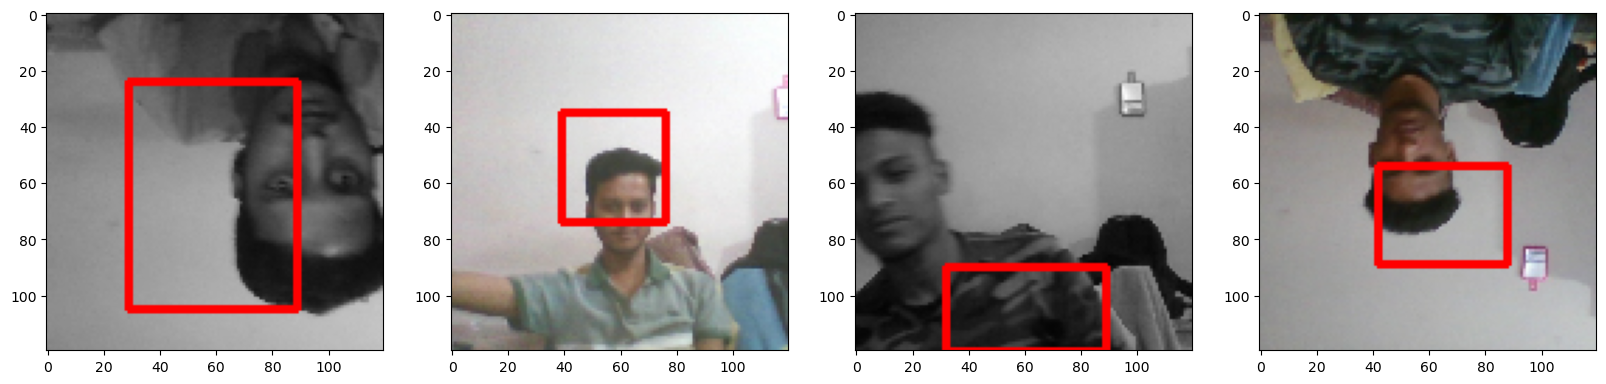

In [176]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
    sample_img = res[0][idx].copy()
    sample_coords=res[1][1][idx].copy()
    sample_img.setflags(write=True)
    
    cv2.rectangle(
        sample_img,
        tuple(np.multiply(sample_coords[:2],[120,120]).astype(int)),
        tuple(np.multiply(sample_coords[2:],[120,120]).astype(int)),
        (255,0,0),
        2
    )
    ax[idx].imshow(sample_img)